Maximo=  255
Minimo=  0
500
369
Numero de islas =  9
[[1 0 1]
 [0 1 0]
 [1 0 1]]
Umbral Otsu =  0.0
Cantidad de islas =  9


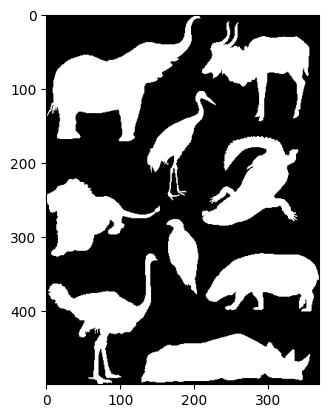

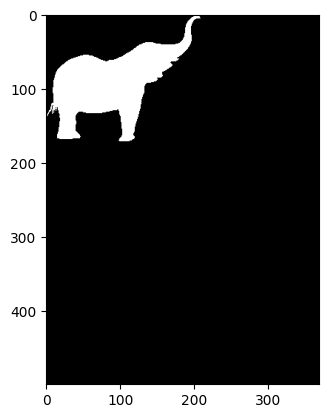

In [5]:
import numpy as np # importar libreria 
from matplotlib import pyplot as plt 

#Libreria de imagenes 
from PIL import Image #Libreria de procesamiento de imagenes
import cv2
from skimage import measure

def procesado(img):
   

        fig1, ax1 = plt.subplots() #figura 2
        im = ax1.imshow(img)
        y = np.array(range(0))
        ax1.plot(y)
        img = Image.open("animales.png").convert('L')
               
        pix_val=list(img.getdata())
        print("Maximo= ", np.max(pix_val))
        print("Minimo= ", np.min(pix_val))
        img=np.array(img)
        [n,m]=img.shape
        print(n)
        print(m)
        
        # plt.imshow(bw_img,cmap='gray')
        umbral,img_bin=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        #plt.imshow(img_bin,cmap='gray')

        blobs_labels = measure.label(img_bin, background=0)

        # plt.imshow(blobs_labels, cmap="nipy_spectral")
        print("Numero de islas = ",np.max(blobs_labels))
        # plt.axis("off")

        #kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], np.uint8)
        kernel = np.array([[1,0,1],[0,1,0],[1,0,1]], np.uint8)# el aumento del kernel no ayudo y no hizo diferencia entre menos fue mayor la exactitiud para "borrar"
        #los pelitos
        print(kernel)
        img_eroded = cv2.erode(img_bin, kernel, iterations = 5)#aqui es el limite que tenemos con la imagen lateral 
        #plt.imshow(img_eroded, cmap="gray")
        # plt.axis("off")
        umbral,img_bw = cv2.threshold(img,1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        print("Umbral Otsu = ", umbral)
        # plt.imshow(img_bw,cmap="gray")
        kernel = np.array([[1,0,1],[1,0,1],[1,0,1]], np.uint8)
        img_dilate = cv2.dilate(img_bw,kernel,iterations = 0)# aqui al momento de aumentas nos regresaba el pelito que queriamos borrar, por ende fue que dejamos a 0 
        #al momento en que nosotros dilabamos quitaba una parte del hueso.
        
        #plt.imshow(img_dilate,cmap="gray")
        blobs_labels = measure.label(img_dilate,background=0)
        print("Cantidad de islas = ", np.max(blobs_labels))
        # plt.axis("off")
        mask = np.where(blobs_labels == 1, 1, 0)
        mask = np.logical_not(mask)
        img_mask = np.copy(img)
        img_mask[mask] = 0
        # plt.imshow(img_mask)
        # plt.axis("off")
    
    
        fig, ax = plt.subplots()
        im = ax.imshow(img_mask)#figura 3
        img_graym = plt.imshow(img_mask, cmap = "gray") 
        x = np.array(range(0))
        ax.plot(x)
        plt.show()

imagen= Image.open("animales.png")
procesado(imagen)